In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
x = torch.linspace(-5, 5, 100)
y = F.gelu(x)

In [3]:
x_var = x.clone().requires_grad_(True)
y_var = F.gelu(x_var)
y_var.sum().backward()
dy = x_var.grad

<Figure size 640x480 with 0 Axes>

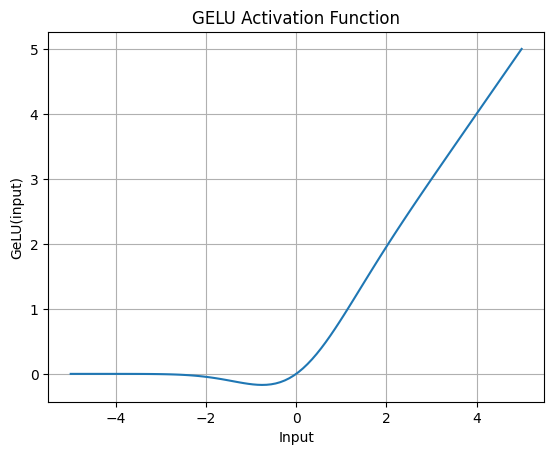

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure()
plt.plot(x, y)
plt.title('GELU Activation Function')
plt.xlabel('Input')
plt.ylabel('GeLU(input)')
plt.grid(True)
plt.figure()

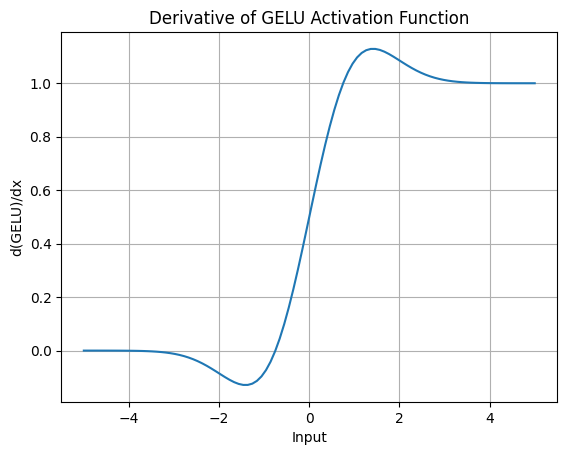

In [5]:
plt.figure()
plt.plot(x, dy)
plt.title('Derivative of GELU Activation Function')
plt.xlabel('Input')
plt.ylabel('d(GELU)/dx')
plt.grid(True)
plt.show()

In [11]:
x_relu = torch.linspace(-5, 5, 100)
y_relu = F.relu(x)
y_var_relu = F.relu(x_var)
y_var_relu.sum().backward()
dy_relu = x_var.grad

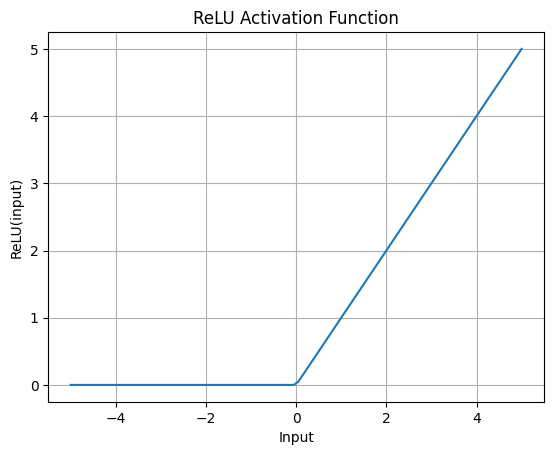

In [12]:
plt.figure()
plt.plot(x_relu, y_relu)
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('ReLU(input)')
plt.grid(True)
plt.show()

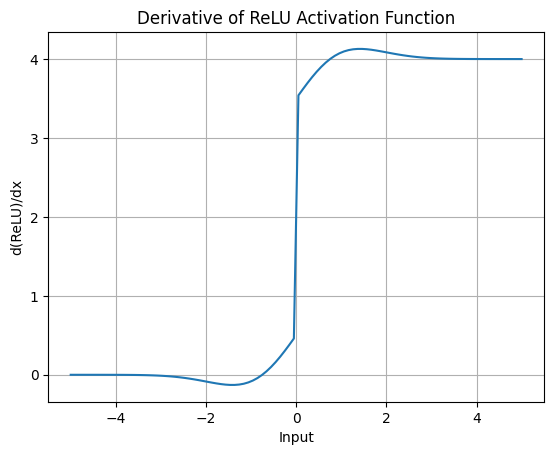

In [13]:
plt.figure()
plt.plot(x_relu, dy_relu)
plt.title('Derivative of ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('d(ReLU)/dx')
plt.grid(True)
plt.show()

In [15]:
X, Y = make_blobs(n_samples=100, centers=[(-2, -2), (2, 2)], random_state=0, cluster_std=0.60)
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y.reshape(-1, 1), dtype=torch.float32)

In [38]:
class SimpleNN(nn.Module):
    def __init__(self, activation='relu'):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)

        
        if activation == 'gelu':
            self.act = nn.GELU()
        elif activation == 'relu':
            self.act = nn.ReLU()
        else:
            raise ValueError("Unsupported activation function")
        self.out = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return self.out(x)        
            

In [62]:
def train(model, X, Y, epochs=100, lr=0.1):
    opt = optim.SGD(model.parameters(), lr=lr)
    history=[]
    for epoch in range(epochs):
        model.train()
        Y_pred = model(X)
        loss = F.binary_cross_entropy(Y_pred, Y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        acc = ((Y_pred>0.5).float() == Y).float().mean().item()
        history.append((loss.item(), acc))
    return history    

In [63]:
relu_hist = train(SimpleNN(activation='relu'), X, Y)
gelu_hist = train(SimpleNN(activation='gelu'), X, Y)

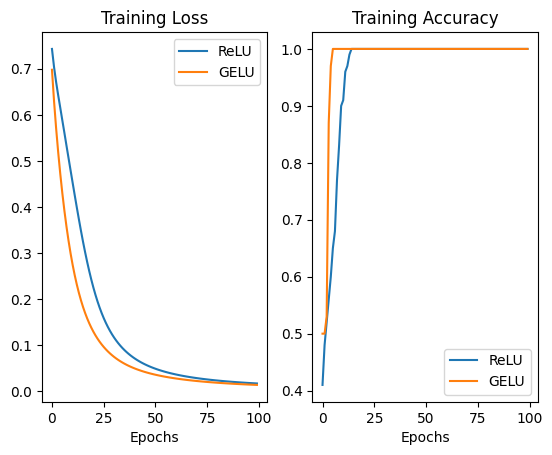

In [64]:
plt.subplot(1, 2, 1)
plt.plot([h[0] for h in relu_hist], label='ReLU')
plt.plot([h[0] for h in gelu_hist], label='GELU')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot([h[1] for h in relu_hist], label='ReLU')
plt.plot([h[1] for h in gelu_hist], label='GELU')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()